In [1]:
# to organize the bike shops data from different sources
import ReviewData as RD

In [2]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
bikeways = RD.readBikeFacility()

In [3]:
bikeways.head()

,id,name,type,source,geom
0,951,None,Shared Use Path,SPR,"LINESTRING (4256230.266 888843.222, 4256258.02..."
1,993,None,Shared Use Path,SPR,"LINESTRING (4256387.264 889850.322, 4256435.45..."
2,1,None,Paved Shoulder,LCOG,"LINESTRING (4216611.495 857908.927, 4216569.84..."
3,2,Fox Hollow,Bike Route,LCOG,"LINESTRING (4240496.355 857938.484, 4240518.05..."
4,3,Fox Hollow,Bike Route,LCOG,"LINESTRING (4240082.967 859115.739, 4240067.37..."


In [5]:
eugbikeshops = RD.readEugeneBikeShops()

In [6]:
lensbikeshops = RD.readLensBikeShops()

In [7]:
bikestores = RD.readBikeStores()

In [8]:
business = RD.readBusiness()

In [9]:
eugbikeshops.head()

,Name,geometry
0,Klink Cycles,POINT (4232902.330 889351.829)
1,REI - Recreational Equipment Inc.,POINT (4237930.863 881335.916)
2,Bicycle Way of Life - 2 Shops,POINT (4238656.305 880646.520)
3,Hutch's Bicycle Store,POINT (4238768.476 878957.079)
4,UO Bike Program Maintenance Shop,POINT (4244396.762 875505.342)


In [10]:
bikestores.head()

,OBJECTID,business_n,business_d,address,city,state,zip,zip_plus4,zip_full,county,...,location_3,location_4,lcog_corre,lcog_cor_1,address_ma,address_ge,address__1,address__2,date_row_i,geometry
0,493,Hutch s Bicycle,,960 Charnelton St,Eugene,OR,97401,3028,97401-3028,Lane,...,$1-2.5 Million,1846000,,,1,26961,Matched,Exactly one address found by matching address ...,2018-01-02T00:00:00,POINT (4238790.910 878943.296)
1,494,Hutch s Bicycle Store,,2100 Main St,Springfield,OR,97477,5070,97477-5070,Lane,...,"$500,000-1 Million",739000,,,1,130463,Matched,Exactly one address found by matching address ...,2018-01-02T00:00:00,POINT (4265516.035 876981.209)
2,4902,Life Cycle Bike Shop,,1733 Pearl St # B,Eugene,OR,97401,4163,97401-4163,Lane,...,$1-2.5 Million,1661000,,,1,1018884,Matched,Exactly one address found by matching address ...,2018-01-02T00:00:00,POINT (4240438.712 875716.287)
3,12187,Paul s Bicycle Way Of Life,,2480 Alder St,Eugene,OR,97405,3006,97405-3006,Lane,...,$1-2.5 Million,1108000,,,1,16335,Matched,Exactly one address found by matching address ...,2018-01-02T00:00:00,POINT (4242642.364 872729.713)
4,12189,Paul s Bicycle Way Of Life,,556 Charnelton St,Eugene,OR,97401,2647,97401-2647,Lane,...,$2.5-5 Million,3691000,,,1,26941,Matched,Exactly one address found by matching address ...,2018-01-02T00:00:00,POINT (4238844.725 880555.942)


In [11]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [12]:
bikeways.crs = "EPSG:2914"
bikeways = bikeways.to_crs(epsg=3857)

In [13]:
eugbikeshops = eugbikeshops.to_crs(epsg=3857)

In [14]:
lensbikeshops = lensbikeshops.to_crs(epsg=3857)

In [15]:
bikestores = bikestores.to_crs(epsg=3857)

In [16]:
business.columns

Index(['biz_business_name', 'biz_business_desc', 'biz_address', 'biz_city',
       'biz_state', 'biz_zip', 'biz_zip_plus4', 'biz_zip_full', 'biz_county',
       'biz_carrier_route', 'biz_delivery_point_bar_code', 'biz_neighborhood',
       'biz_phone', 'biz_phone_toll_free', 'biz_fax', 'biz_website',
       'biz_primary_sic_code', 'biz_primary_sic_desc', 'biz_sic_code_1',
       'biz_sic_code_1_desc', 'biz_sic_code_2', 'biz_sic_code_2_desc',
       'biz_sic_code_3', 'biz_sic_code_3_desc', 'biz_sic_code_4',
       'biz_sic_code_4_desc', 'biz_naics_industry_code_group',
       'biz_naics_industry_desc', 'biz_primary_naics',
       'biz_primary_naics_desc', 'biz_naics_1', 'biz_naics_1_desc',
       'biz_naics_2', 'biz_naics_2_desc', 'biz_naics_3', 'biz_naics_3_desc',
       'biz_naics_4', 'biz_naics_4_desc', 'biz_cuisine_code',
       'biz_cuisine_code_desc', 'biz_location_employee_size_code',
       'biz_location_employee_size_range', 'biz_location_employee_size_actual',
       'biz_busi

In [17]:
sorted(list(business.biz_primary_sic_desc.unique()))

['Abortion Information & Services',
 'Abrasive Products (Mfrs)',
 'Accessories-Fashion',
 'Accommodations',
 'Accountants',
 'Accountants-Certified-General',
 'Accounting & Bookkeeping General Svc',
 'Acoustical Contractors',
 'Acoustical Materials-Manufacturers',
 'Acupuncture',
 'Addiction Treatment Centers',
 'Adhesives & Glues-Manufacturers',
 'Adhesives & Gluing Equipment-Mfrs',
 'Adjusters-Public',
 'Adoption Agencies',
 'Adult Care Facilities',
 'Adventure Vacations',
 'Advertising Marketing',
 'Advertising NEC',
 'Advertising-Agencies & Counselors',
 'Advertising-Computer',
 'Advertising-Direct Mail',
 'Advertising-Directory & Guide',
 'Advertising-Newspaper',
 'Advertising-Outdoor',
 'Advertising-Promotional',
 'Advertising-Specialties (Whls)',
 'Advertising-Television',
 'Advocacy Resources',
 'Aerospace Support Services-Technical',
 'Agricultural Construction',
 'Agricultural Products',
 'Air Balancing',
 'Air Cargo Service',
 'Air Conditioning Contractors & Systems',
 'Air 

In [18]:
BikeBusiness = business[business.biz_primary_sic_desc.isin(['Bicycle Fabricators (Mfrs)', 
                                                            'Bicycles-Dealers', 
                                                            'Bicycles-Repairing'])]

In [19]:
BikeBusiness = BikeBusiness.to_crs(epsg=3857)

In [20]:
BikeBusiness = gpd.clip(BikeBusiness, MPObd)

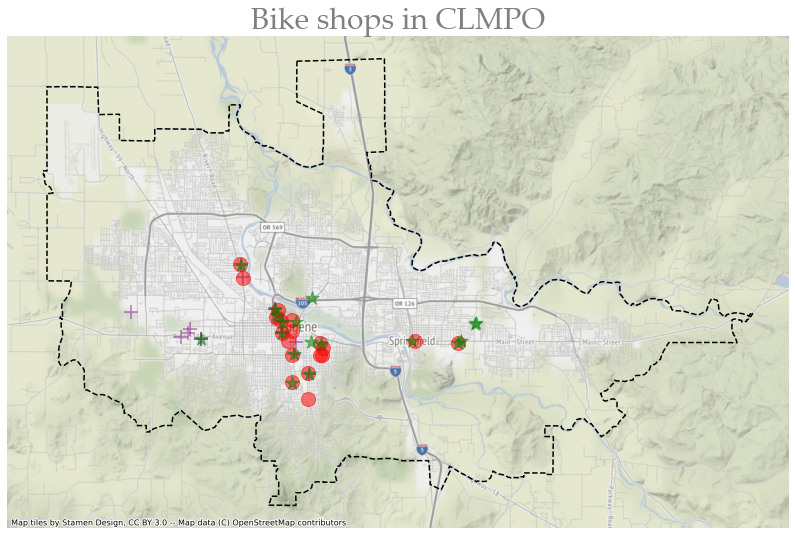

In [21]:
fig, ax = plt.subplots(figsize=(14, 12))
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
#bikeways.plot(ax=ax, color='blue', linewidth = 0.5, aspect=1)
BikeBusiness.plot(ax=ax, marker='+', markersize=200, color='purple', alpha=.5, aspect=1)
eugbikeshops.plot(ax=ax, marker='o', markersize=200, color='red', alpha=.5, aspect=1)
lensbikeshops.plot(ax=ax, marker='o', markersize=200, color='red', alpha=.5, aspect=1)
bikestores.plot(ax=ax, marker='*', markersize=200, color='green', alpha=.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Bike shops in CLMPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [22]:
# combine Eugene and Sprinfield bike shops
eugbikeshops.head()

,Name,geometry
0,Klink Cycles,POINT (-13705619.665 5477412.137)
1,REI - Recreational Equipment Inc.,POINT (-13703385.334 5474073.795)
2,Bicycle Way of Life - 2 Shops,POINT (-13703069.260 5473790.577)
3,Hutch's Bicycle Store,POINT (-13702999.616 5473074.602)
4,UO Bike Program Maintenance Shop,POINT (-13700572.910 5471682.715)


In [23]:
lensbikeshops.head()

,NAME,geometry
0,Peak Sports Service,POINT (-13691854.637 5472440.468)
1,Peak Sports Retail & The Pedaler,POINT (-13694546.142 5472565.274)


In [28]:
lensbikeshops.rename(columns={'NAME':'Name'}, inplace=True)

In [29]:
bikeshops = eugbikeshops.append(lensbikeshops, ignore_index=True)

In [30]:
bikeshops.tail()

,Name,geometry
14,Landspeed's Fix,POINT (-13702606.940 5472556.022)
15,UO Bike Repair Station,POINT (-13700376.875 5472112.613)
16,UO Bike Repair Station,POINT (-13701331.221 5468885.433)
17,Peak Sports Service,POINT (-13691854.637 5472440.468)
18,Peak Sports Retail & The Pedaler,POINT (-13694546.142 5472565.274)


In [32]:
bikeshops.rename(columns={'Name':'name'}, inplace=True)

In [33]:
bikeshops.to_file(os.path.join(r"T:\DCProjects\StoryMap\BikeCounting\BikeMap", "bike_shops.shp"))